<a href="https://colab.research.google.com/github/chychur/Unsupervised-Learning.-Clastrezation.-K-means-algoritm/blob/main/Unsupervised_Learning_clastrezation_K_means_algoritm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Unsupervised Learning. Clastrezation. K-means algoritm

There is a [archive](https://drive.google.com/file/d/1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6/view "dataset download") containing 2 files: `mnist.csv` - two-dimensional dataset and `data_2d.csv`.

The task consists of two parts:

**PART 1.** For each of the datasets, apply the "K-means" clustering algorithm to find the optimal number of clusters (using the elbow method).

**PART 2.** Visualize the result of clustering work. For the "mnist" dataset,
apply the PCA algorithm to reduce the dimensionality of the data to a 2-dimensional version.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#presetings

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

URL_data_2d = "/content/drive/MyDrive/Colab Notebooks/data_6/data_2d.csv"
URL_mnist = "/content/drive/MyDrive/Colab Notebooks/data_6/mnist.csv"

In [ ]:
data_2d = pd.read_csv(URL_data_2d)
mnist = pd.read_csv(URL_mnist)

### Part 1

In [ ]:
K = range(1, 8)

In [ ]:
def k_means(frame):
    distortions = []
    for k in K:
        k_meanModel = KMeans(n_clusters=k, n_init='auto')
        k_meanModel.fit(frame)
        distortions.append(k_meanModel.inertia_)

    return distortions

In [ ]:
def show_k(distortions):
    plt.figure(figsize=(16, 8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

### 1.1 The Elbow Method visualization

1.1.1 -  for "*data_2d*" dataset

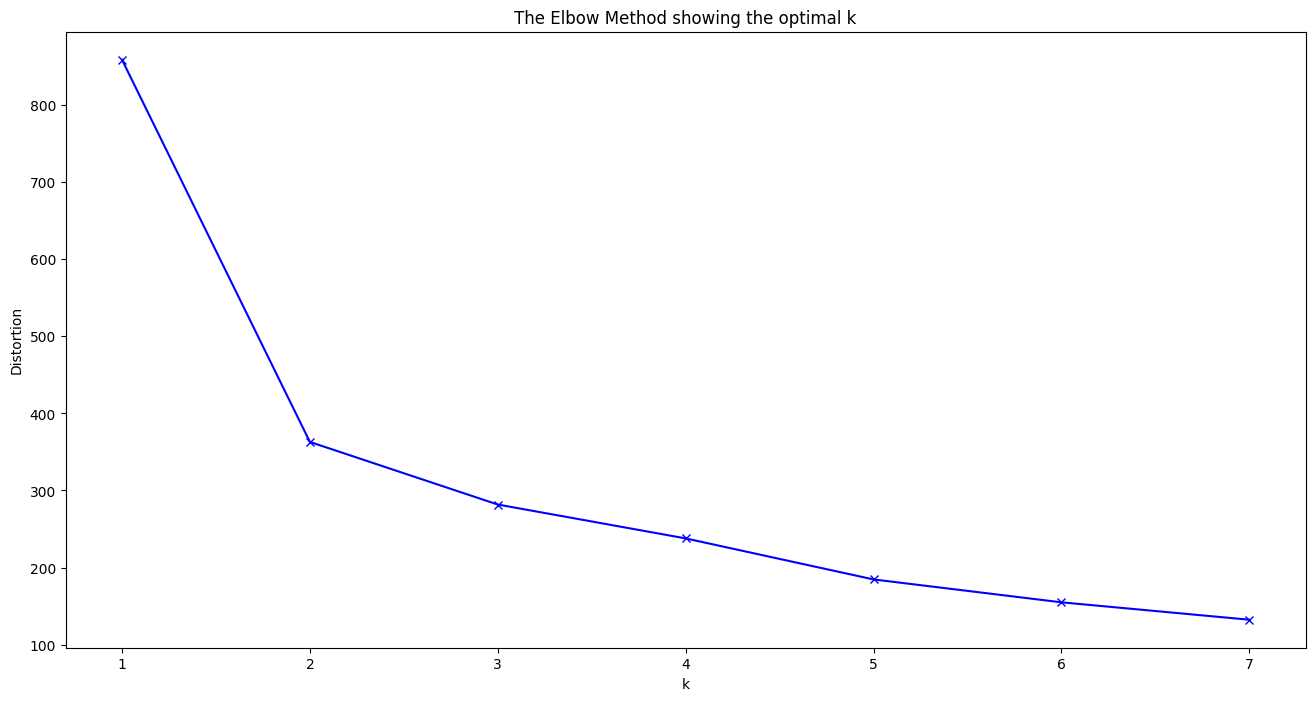

In [ ]:
show_k(k_means(data_2d))

1.1.2 for "*mnist*" dataset (but before, should reduce data dimensionality to 2-dimensional version)

In [ ]:
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(mnist)

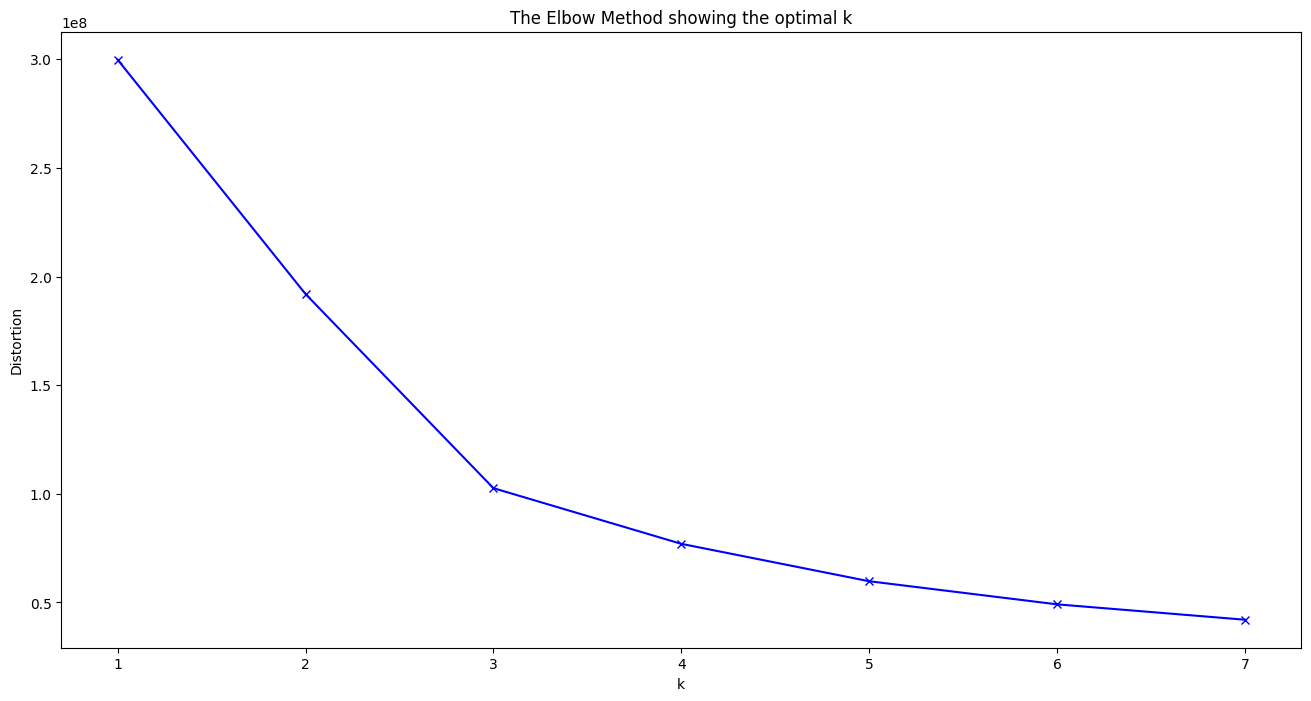

In [ ]:
show_k(k_means(mnist_2d))

### 1.2 Conclusion

The optimal number of clusters for "*data_2d*" dataset is **2**, and for "*mnist*" is **3**.

### Part 2

In [ ]:
def show_clustering(data, k, title):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(data)

    plt.figure(figsize=(16,8))
    plt.title(title)
    sns.scatterplot(x=data[:,0], y=data[:,1], c= kmeans.labels_, cmap='cool' )
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], c=['black'])

Visualize the result of clustering for "*data_2d*" and "*minist*" datasets:

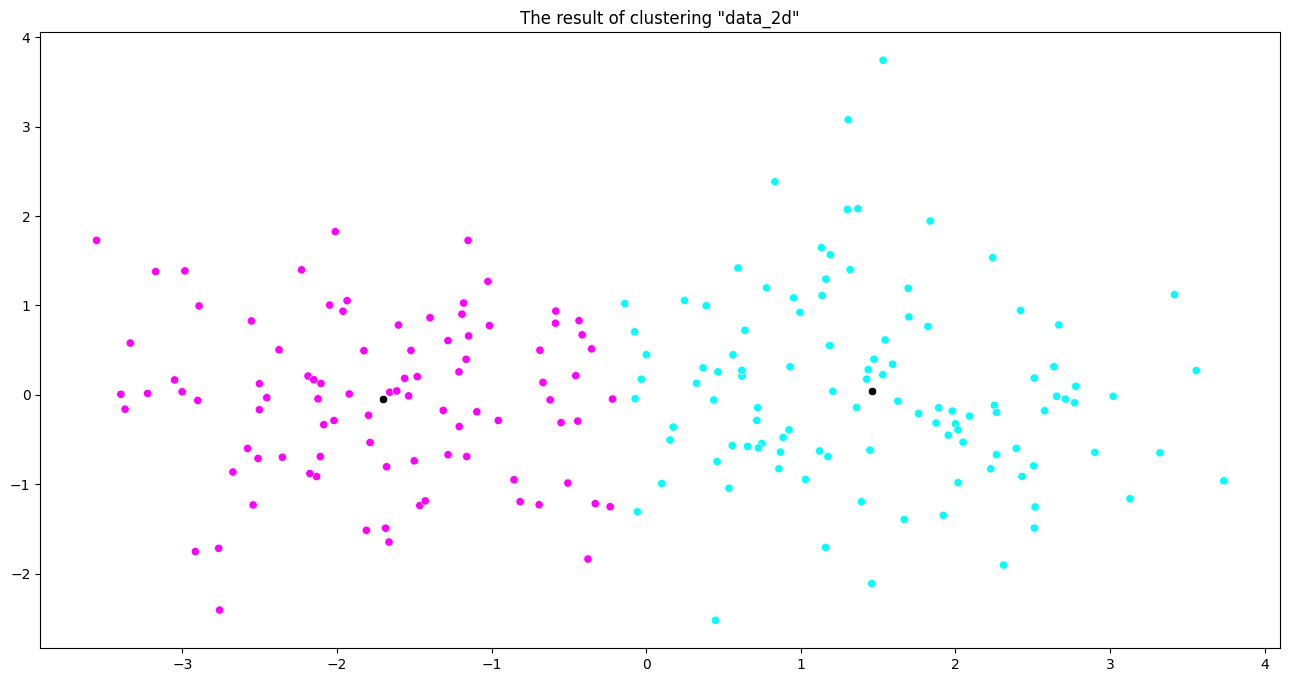

In [ ]:
show_clustering(pca.fit_transform(data_2d), 2, 'The result of clustering "data_2d"')


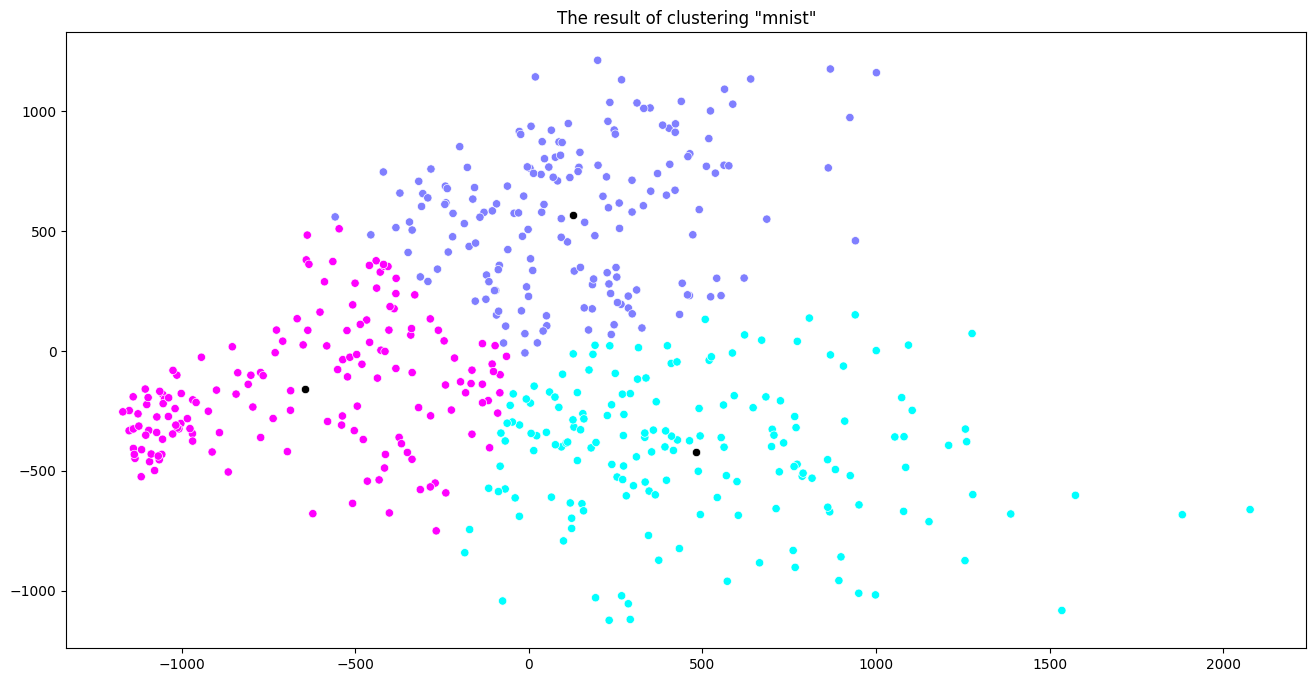

In [ ]:
show_clustering(pca.fit_transform(mnist), 3, 'The result of clustering "mnist"')